In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [129]:
# How we calculate the distribution over a region of variable length 

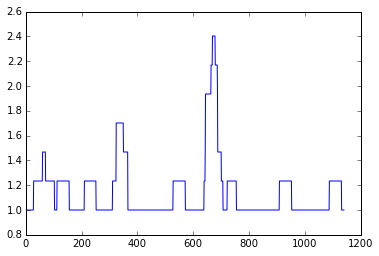

In [130]:
# Raw density file over the region: chr11:95,883,299-95,884,440 for 204_01_RBFOX2
# The bw files are here: /projects/ps-yeolab3/encode/analysis/encode_v12/204_01_RBFOX2.merged.r2.norm.pos.bw
longregion_rawdensities = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/longregion.rawdensities.csv')
longregion_rawdensities.fillna(0,inplace=True)
plt.plot(abs(longregion_rawdensities)+1)

In [131]:
import itertools

def chunks(l, n):
    """
    Yield successive n-sized chunks from l.
    """
    for i in range(0, len(l), n):
        yield l[i:i+n].mean()

def multiply(n):
    return [n]*100

In [136]:
def get_distribution(wiggle):
    """
    given a list of arbitrary length > 100, 
    normalize them into a list of length 100
    """
    if len(wiggle) < 100:
        wiggle = list(itertools.chain.from_iterable([multiply(w) for w in wiggle]))
        # wiggle = pd.Series(np.vstack(([wiggle]*100)).reshape((-1,),order='F'))
    wiggle = (chunks(pd.Series(wiggle),len(wiggle)/100))
    wiggle = pd.Series(wiggle)
    
    return wiggle

In [137]:
def get_distribution2(wiggle):
    
    dist = {0:0}
    x = 0
    step = 0.01
    y = 0
    if len(wiggle) < 100:
        wiggle = pd.Series(list(itertools.chain.from_iterable([multiply(w) for w in wiggle])))
    for pos, value in enumerate(wiggle):
        #print("pos: {}, len(wiggle): {}".format(pos+1,len(wiggle)))
        if(float(pos+1)/len(wiggle)) < step:
            y = y + 1
            """print("DOESNT make the next step: {}/{} = {}, x = {}, y = {}".format(pos+1,len(wiggle),
                                                                                   float(pos+1)/len(wiggle),
                                                                                   x,y))"""
            
            dist[x] = dist[x] + value
            # print("dist[{}] = {}".format(x,dist[x]))
            
        else:
            """print("DOES make the next step: {}/{} = {}, x = {}, y = {}".format(pos+1,len(wiggle),
                                                                                   float(pos+1)/len(wiggle),
                                                                                   x,y))"""
            dist[x] = dist[x] / y
            # print("dist[{}] = {} after dividing by {}".format(x,dist[x],y))
            step = step + 0.01
            x = x + 1
            dist[x] = value
            # print("dist[{}] = {}".format(x,dist[x]))
            y = 1
    dist[x] = dist[x] / y
    # print("dist[{}] = {} after dividing by {}".format(x,dist[x],y))
    return(pd.Series(dist))

In [138]:
def get_distribution3(wiggle):
    
    dist = [0]*100
    x = 0
    step = 0.01
    y = 0
    if len(wiggle) < 100:
        wiggle = pd.Series(list(itertools.chain.from_iterable([multiply(w) for w in wiggle])))
    for pos, value in enumerate(wiggle):
        #print("pos: {}, len(wiggle): {}".format(pos+1,len(wiggle)))
        if(float(pos+1)/len(wiggle)) < step:
            y = y + 1
            """print("DOESNT make the next step: {}/{} = {}, x = {}, y = {}".format(pos+1,len(wiggle),
                                                                                   float(pos+1)/len(wiggle),
                                                                                   x,y))"""
            
            dist[x] = dist[x] + value
            # print("dist[{}] = {}".format(x,dist[x]))
            
        else:
            """print("DOES make the next step: {}/{} = {}, x = {}, y = {}".format(pos+1,len(wiggle),
                                                                                   float(pos+1)/len(wiggle),
                                                                                   x,y))"""
            dist[x] = dist[x] / y
            # print("dist[{}] = {} after dividing by {}".format(x,dist[x],y))
            step = step + 0.01
            x = x + 1
            dist[x] = value
            # print("dist[{}] = {}".format(x,dist[x]))
            y = 1
    dist[x] = dist[x] / y
    # print("dist[{}] = {} after dividing by {}".format(x,dist[x],y))
    return(pd.Series(dist))

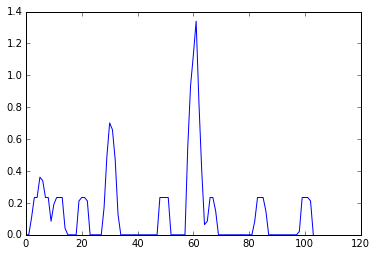

In [139]:
wiggle = pd.Series(longregion_rawdensities['Unnamed: 0'])
plt.plot(abs(get_distribution(wiggle)))

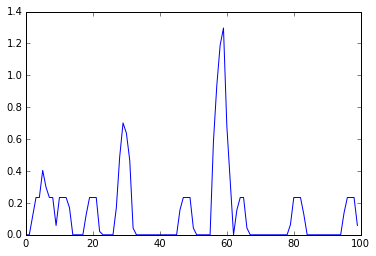

In [109]:
wiggle = pd.Series(longregion_rawdensities['Unnamed: 0'])
plt.plot(abs(get_distribution2(wiggle)))

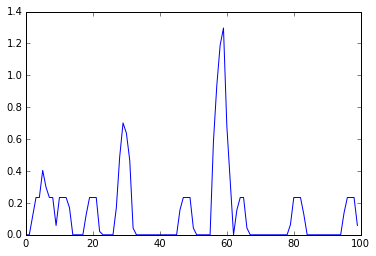

In [110]:
wiggle = pd.Series(longregion_rawdensities['Unnamed: 0'])
plt.plot(abs(get_distribution3(wiggle)))

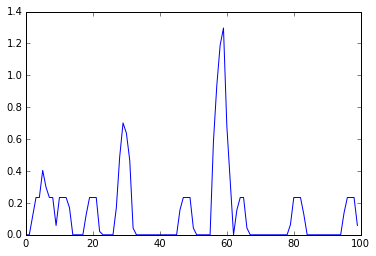

In [127]:
%timeit get_distribution(wiggle)

10 loops, best of 3: 21.3 ms per loop


In [112]:
%timeit get_distribution2(wiggle)

100 loops, best of 3: 3.98 ms per loop


In [113]:
%timeit get_distribution3(wiggle)

100 loops, best of 3: 3.8 ms per loop


In [114]:
wiggle = pd.Series(np.arange(0,99999))
%timeit c = pd.Series(np.vstack(([wiggle]*100)).reshape((-1,),order='F'))

10 loops, best of 3: 70 ms per loop


In [118]:
wiggle = pd.Series(np.arange(0,99999))
%timeit d = pd.Series(list(itertools.chain.from_iterable([multiply(w) for w in wiggle])))

1 loops, best of 3: 3.3 s per loop


In [124]:
c = pd.Series(np.vstack(([wiggle]*100)).reshape((-1,),order='F'))
d = pd.Series(list(itertools.chain.from_iterable([multiply(w) for w in wiggle])))
c[c != d]

Series([], dtype: int64)

In [125]:
d[c != d]

Series([], dtype: int64)

In [141]:
import pybedtools as bt
basic_exons = bt.BedTool('/home/ecwheele/data/analysis/clip/region_annotations_basic/end_of_basic_exons.bed')

In [144]:
def test():
    for feature in basic_exons:
        print str(feature)
        return 0
test()

chrX	15529559	15529641	exon_699039	.	+



0

In [ ]:
test = pd.Series([9])

def multiply(n):
    
